# 7. Regularization

## 7-1. 들어가며

### 학습 목표
---
- 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
- L1 regularization과 L2 regularization의 차이를 설명합니다.
- 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

### 목차
---
1. 들어가며
2. Regularization과 Normalization
3. L1 Regularization
4. L2 Regularization
5. Extra : Lp norm
6. Dropout
7. Batch Normalization

## 7-2. Regularization과 Normalization

### Regularization(정칙화)
---
정칙화라고 불리며, 오버피팅(overfitting)을 해결하기 위한 방법 중의 하나입니다. 오늘 우리가 가장 중요하게 다룰 주제이기도 하지요. L1, L2 Regularization, Dropout, Batch normalization 등이 있습니다. 오버피팅은 한국어로 과적합이라고 하며, train set은 매우 잘 맞히지만, validation/test set은 맞히지 못하는 현상을 말합니다. 비유하자면 오버피팅은 기출문제는 외워서 잘 맞히지만 새로운 응용 문제로 시험을 볼 때는 잘 풀지 못하는 경우라고 할 수 있겠습니다. 더 좋은 결과를 얻기 위해서는 새로운 시험, 즉 test set에서도 잘 맞혀야겠죠? 그래서 regularization 기법들은 모델에 제약 조건을 걸어서 모델의 train loss를 증가시키는 역할을 합니다. 그래서 train loss는 약간 증가하지만 결과적으로, validation loss나 최종 test loss를 감소시키려는 목적을 가지고 있지요.

### Normalization(정규화)
---
정규화라고 불리며, 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정입니다. 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당됩니다. 예를 들어, 금액과 같은 큰 범위의 값(10,000 ~ 10,000,000)과 시간(0~24)의 값이 들어가는 경우, 데이터의 분포가 피처(feature) 값의 범위에 의해 왜곡되어 학습에 방해가 된다는 문제가 있습니다. normalization은 모든 피처 값의 범위를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정입니다.

이 두 가지 단어는 한국어로 번역 시에 혼용하여 쓰기도 하므로, 앞으로 이번 노드에서는 주로 영어로 표기하도록 하겠습니다. 핵심을 정리하면, regularization은 오버피팅을 막고자 하는 방법, normalization은 트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정이라는 것입니다.

Regularization와 Normalization의 간단한 예제를 Iris dataset의 회귀 문제를 풀면서 비교해 보겠습니다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(꽃받침의 길이) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


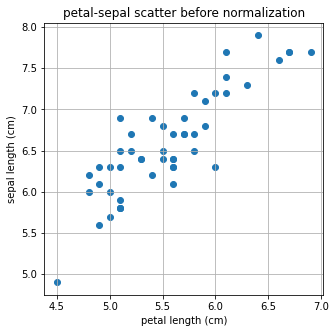

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

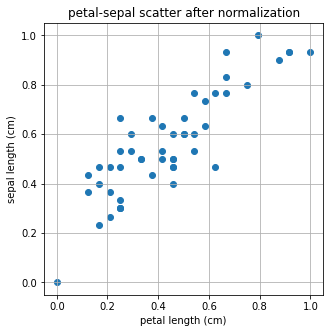

In [4]:
# minmax_scale을 통해 0-1로 normalization


from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이번엔 같은 데이터로 간단한 회귀 문제를 풀면서 regularization에 대해 알아보겠습니다.

sklearn.linear_model에 포함된 LinearRegression 모델을 사용하여 X-Y 관계를 선형으로 모델링해 보겠습니다. 이 sklearn.linear_model에는 L1, L2 regression인 Lasso와 Ridge 모델도 함께 포함되어 있으므로, 이들의 차이점을 먼저 직관적으로 이해해 보겠습니다. 수학적 정의나 보다 구체적인 설명은 다음 스텝에 이어집니다.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


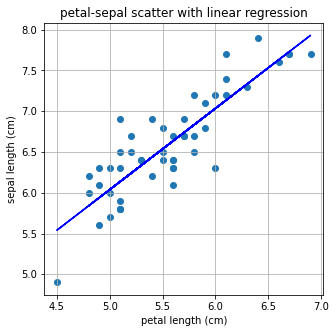

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


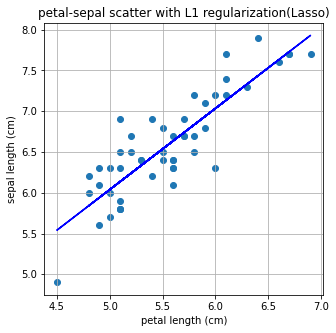

In [10]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X, Y)
plt.plot(X, linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


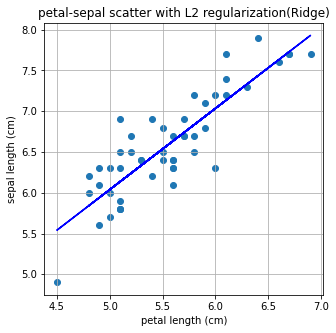

In [11]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L2 regularization은 Ridge로 import 합니다.
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X, Y)
plt.plot(X, linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## 7-3. L1 Regularization

이전 스텝에서 regularization과 normalization의 정의를 설명하고, L1/L2 regularization을 코드로 맛보기 해보았습니다. 마지막에 같은 linear regression 문제를 푸는데 L1 regularization에서는 문제가 풀리지 않았다는 것을 기억하시나요?

L1 regularization을 설명하면서, 지난 스텝에서 Lasso로는 regression 문제가 제대로 풀리지 않았던 현상을 더 자세히 알아보겠습니다. 그리고 어떤 때에 L1 regularization을 사용하는지 알아보는 것이 목표입니다!

### L1 regularization (Lasso)의 정의
---
L1 regularization은 아래와 같은 식으로 정의됩니다. (N: 데이터의 개수, D: 데이터의 차원(feature의 개수))
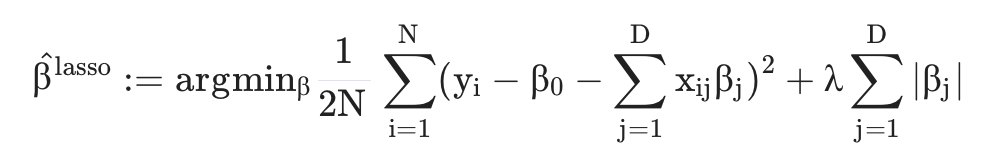
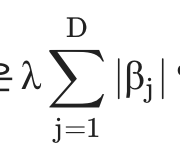
이 부분이 없다면 linear regression과 동일합니다.

이 부분이 바로 L1 norm에 해당하는 부분인데, L1 regularization이라는 이름이 붙은 이유이기도 하고, L2 regularization과의 차이가 나타나는 중요한 부분입니다.

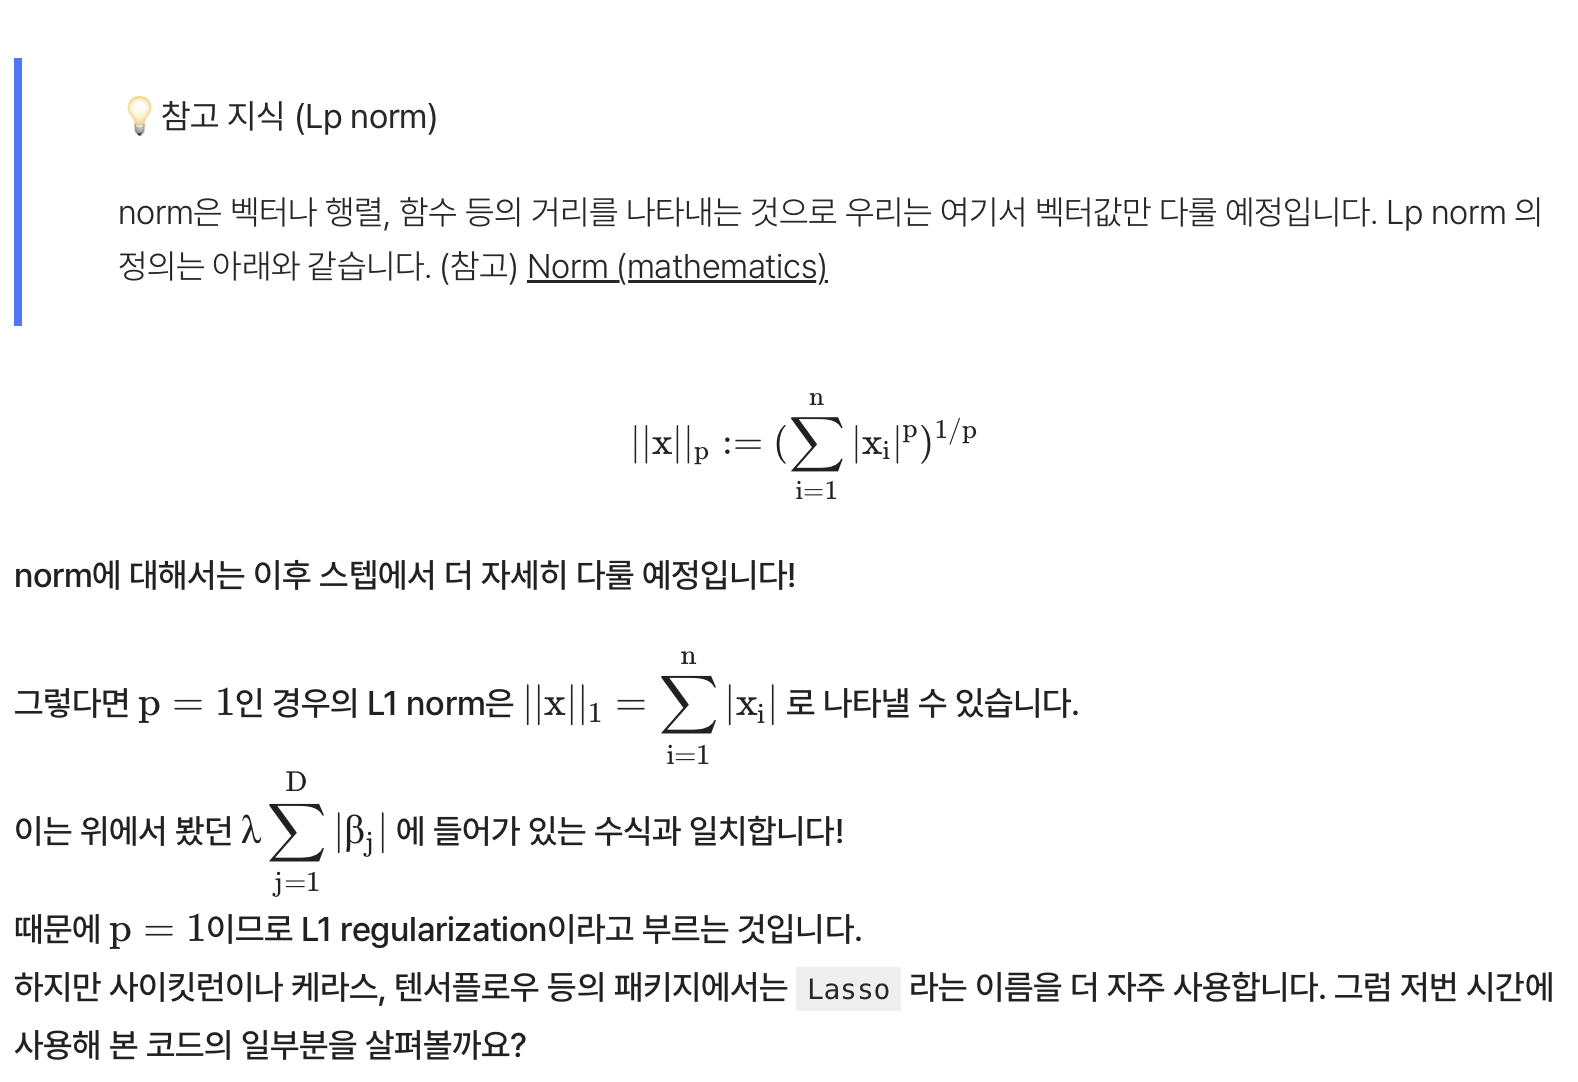

In [12]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


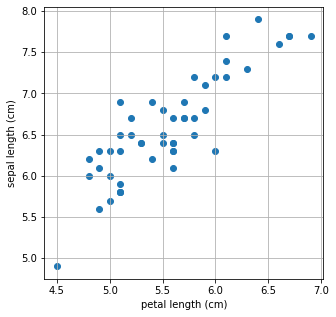

In [13]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


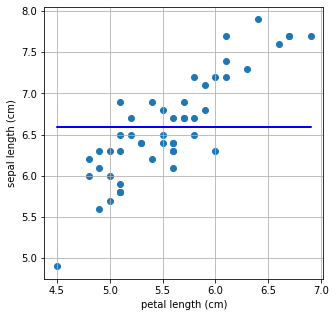

In [14]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

### 컬럼 수가 많은 데이터에서의 L1 regularization 비교
---
Iris 데이터는 특성이 총 4개로 컬럼 수가 너무 적으니 wine dataset을 이용해 보겠습니다.
총 13개의 특성을 갖는 데이터입니다.

In [15]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [16]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


먼저 linear regression 으로 문제를 풀고, 그 계수(coefficient)와 절대 오차(mean absolute error), 제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력해 보겠습니다.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


이번에는 L1 regularization으로 문제를 풀어보겠습니다.

In [20]:
# Q. 위의 Iris 예제 코드를 참고해서, 빈칸을 채워봅시다.

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("Result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

Result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


### 결과 분석
---
coefficient 부분을 보시면 linear regression과 L1 regularization의 차이가 좀 더 두드러짐을 알 수 있습니다. linear regression에서는 모든 컬럼의 가중치가 0이 아닌 값을 가지고 있지만, L1 regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다. error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있습니다. 이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다. 다만 linear regression과 L1, L2 regularization의 차이 중 하나는 하이퍼파라미터(수식에서는 λ)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.

## 7-4. L2 Regularization

### L2 Regularization(Ridge)의 정의
---
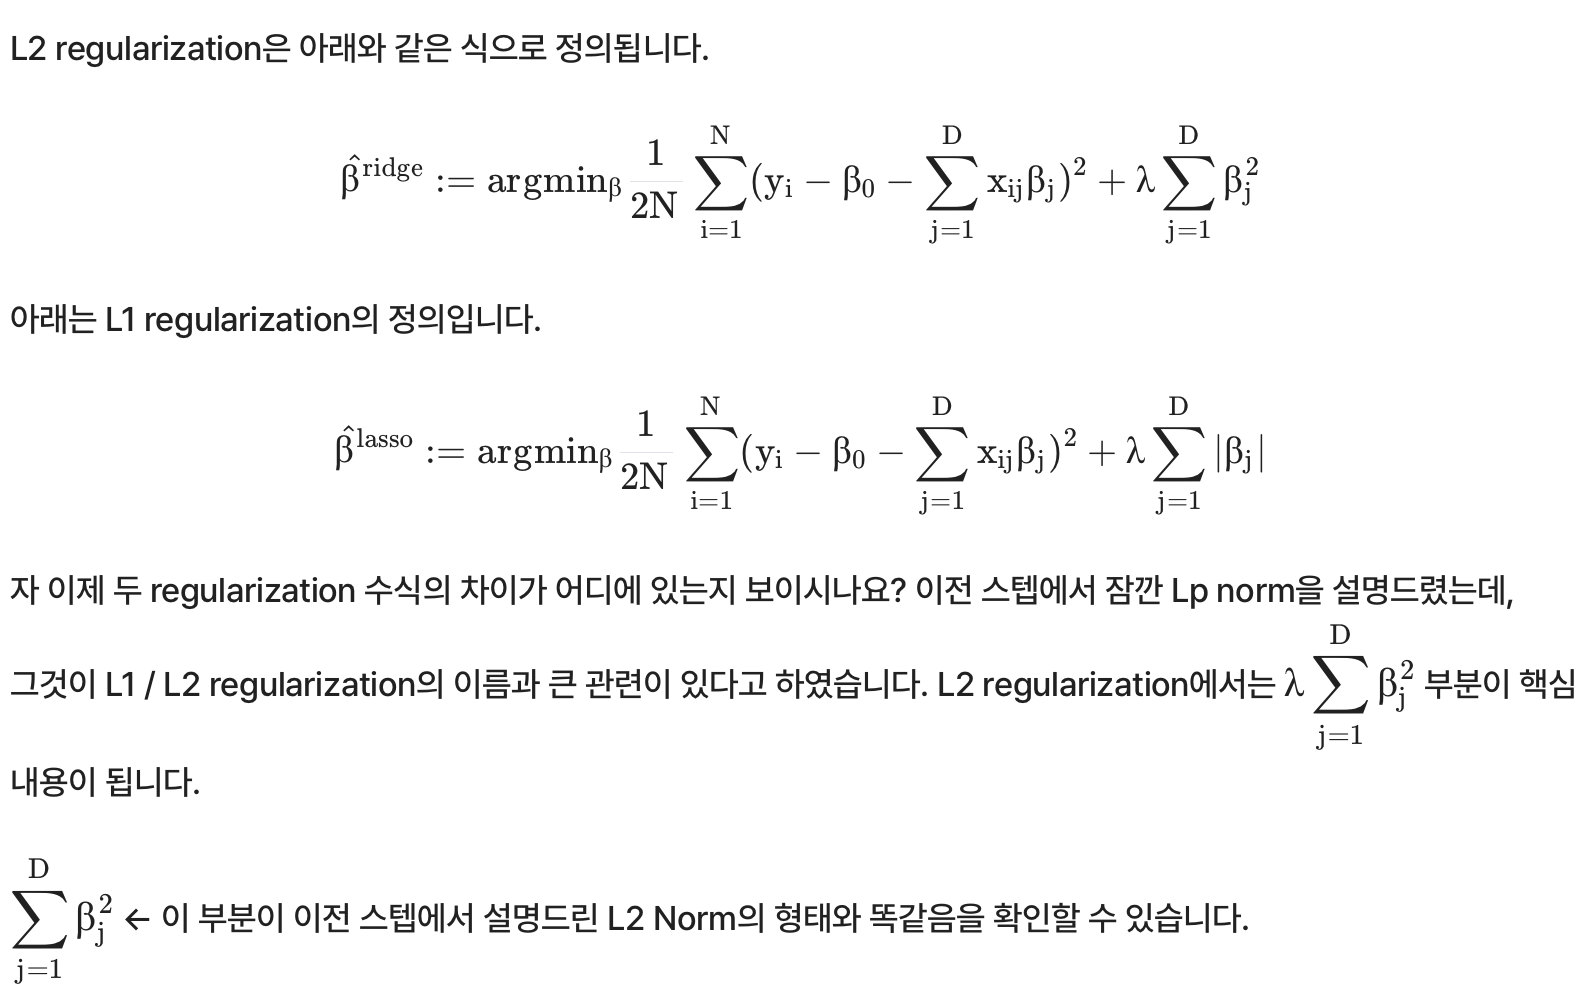

### L1/L2 Regularization의 차이점
---
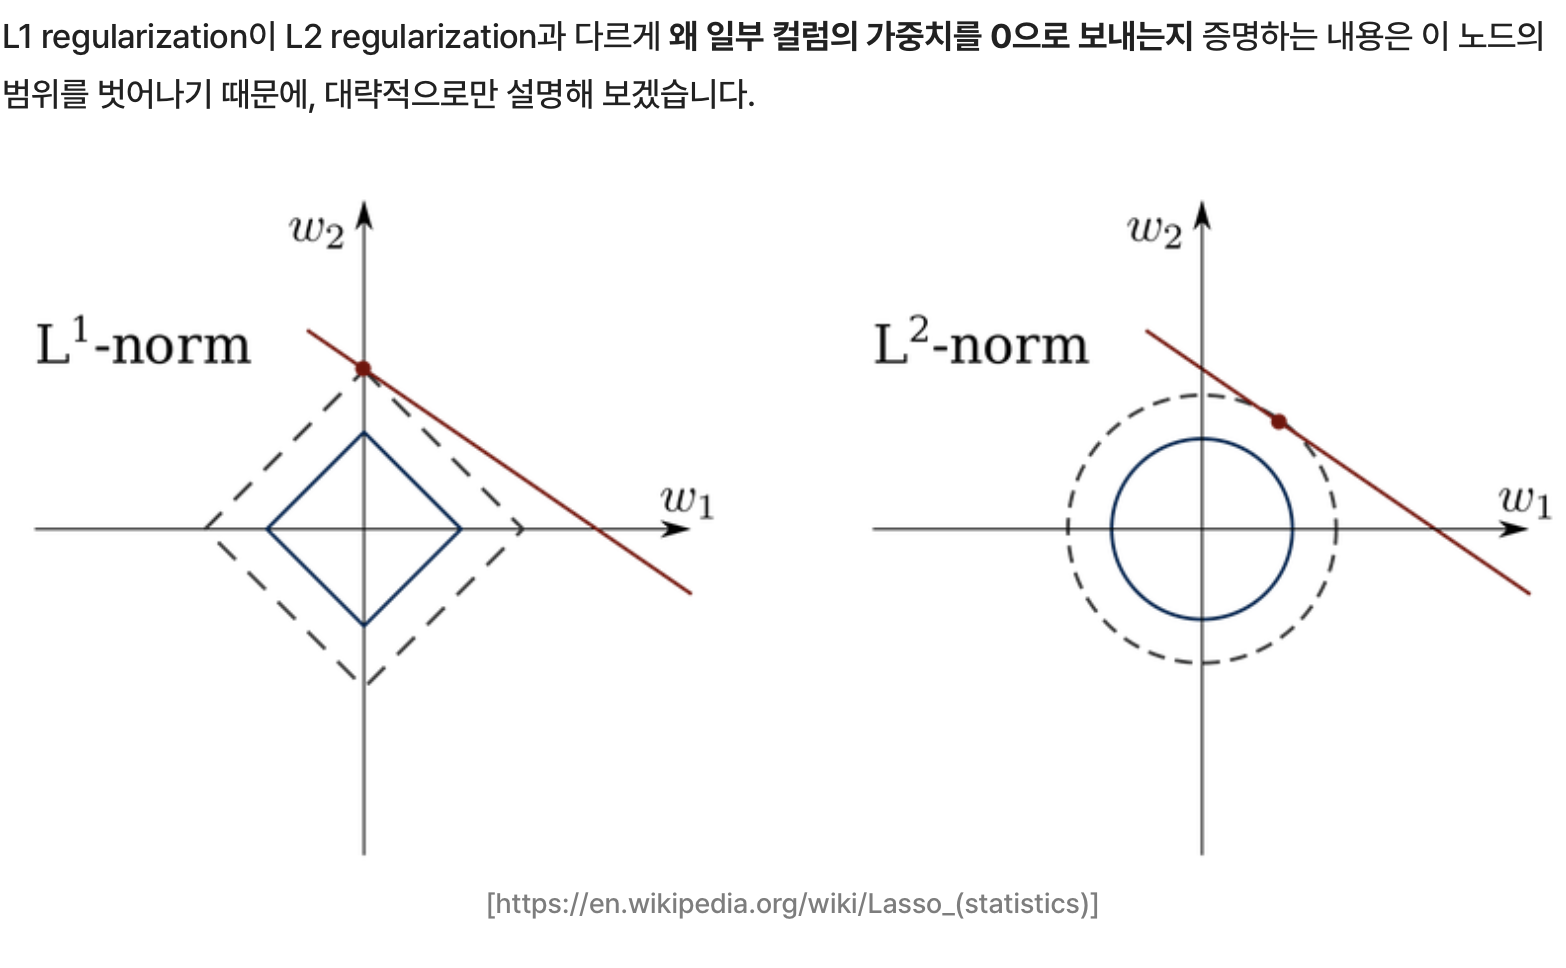
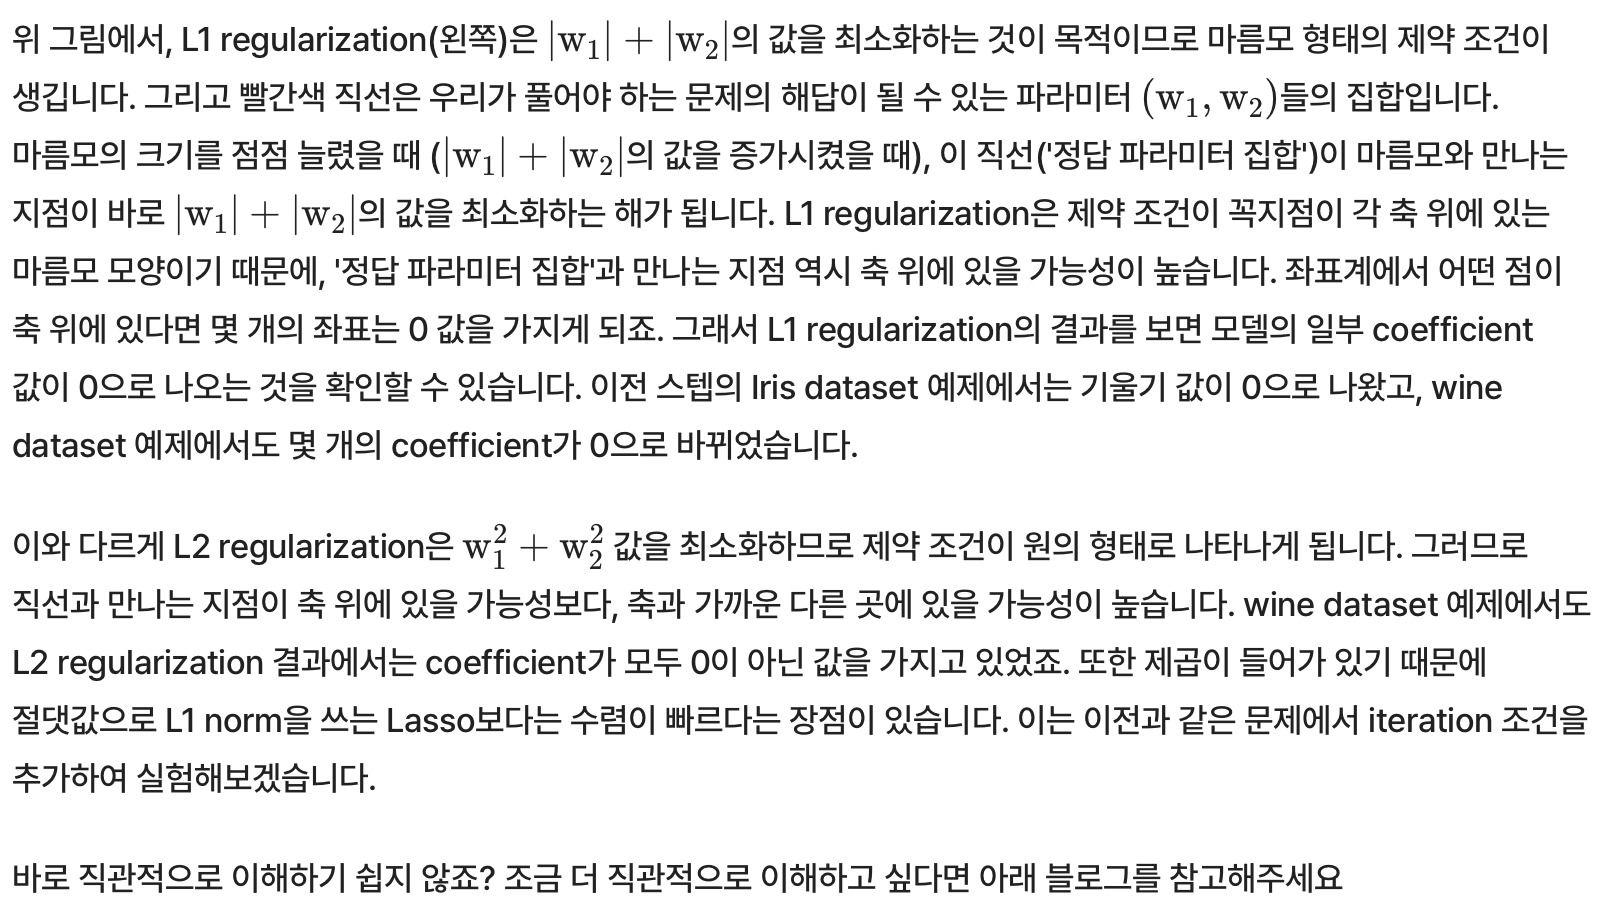

- 정규화에 대해 자세히 알아보자 (https://modulabs.co.kr/blog/learn-about-regularization/)

In [22]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [23]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [24]:
# Q. L1 regularization 코드를 참고하여 아래 코드를 채워주세요.

from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05, max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)


print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


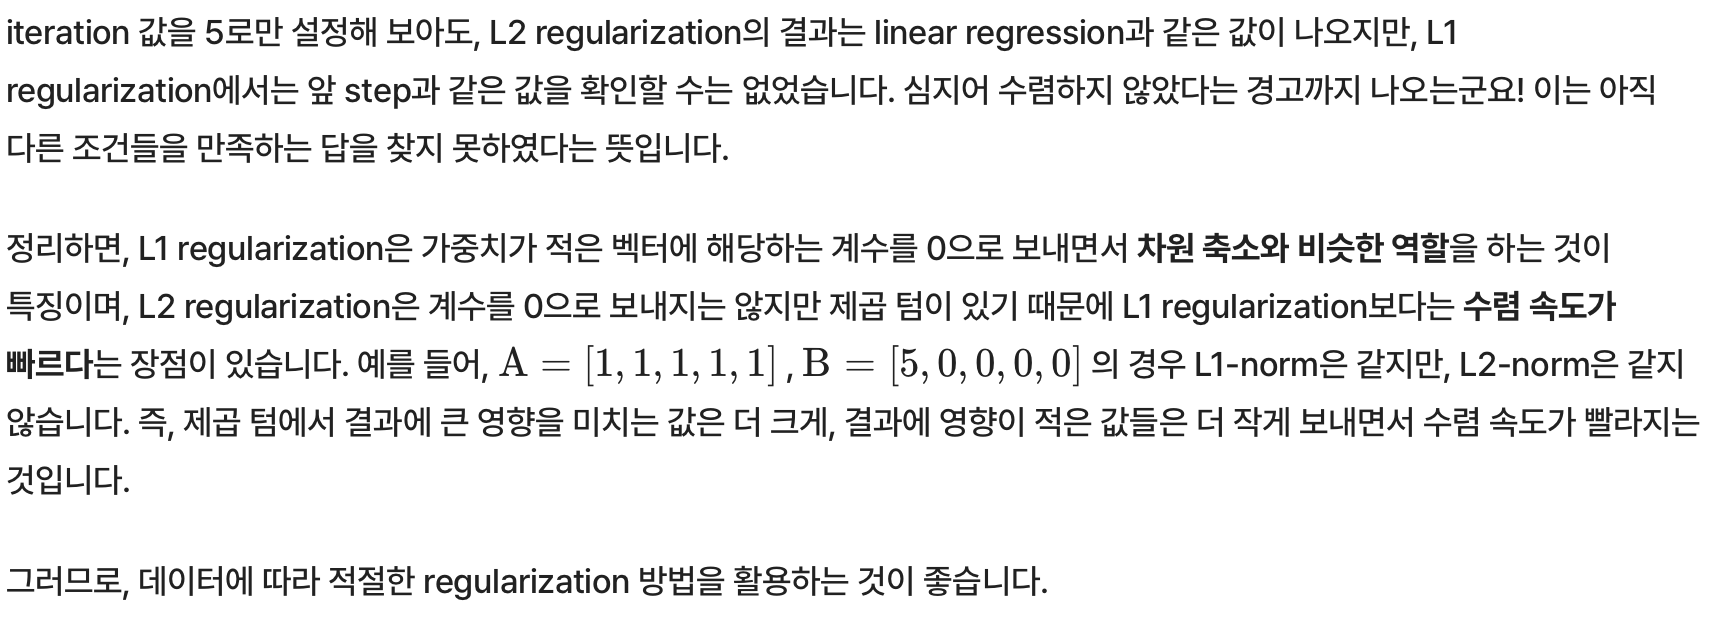

## 7-5. Extra : Lp norm

이전 스텝에서 잠깐 소개해드린 Lp norm에 대해 자세히 설명하겠습니다.
Norm이라는 용어는 벡터뿐만 아니라 함수, 행렬의 크기를 나타내는 개념으로, 딥러닝을 배우는 과정에서는 주로 벡터, 좀 더 어렵게는 행렬의 norm 정도만 알면 됩니다.

### Vector norm
---
L1 / L2 regularization에서 배운 norm은 벡터에서 정의된 norm으로 아래와 같습니다.
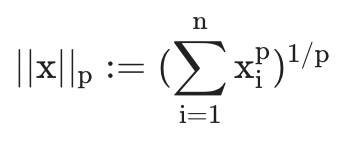
아래 코드에서 p의 값과 x의 형태를 바꾸어가며 실험해 보세요.

In [25]:
# [Playground] x와 p를 바꾸어가며 norm 값이 어떻게 변하는지 실험해봅시다!
# --------------------------- #
x = np.array([1,10,1,1,1])
p = 5
# --------------------------- #

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [27]:
# [Playground] x와 p를 바꾸어가며 norm 값이 어떻게 변하는지 실험해봅시다!
# --------------------------- #
x = np.array([13,5,2,8,10])
p = 10
# --------------------------- #

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 13.10092 
result of making norm : 13.10092 


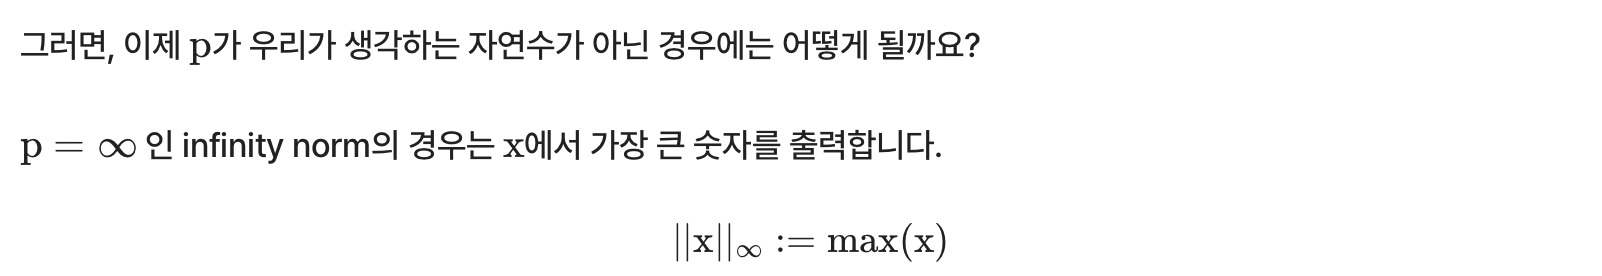

In [28]:
norm_x = np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 13.00000 


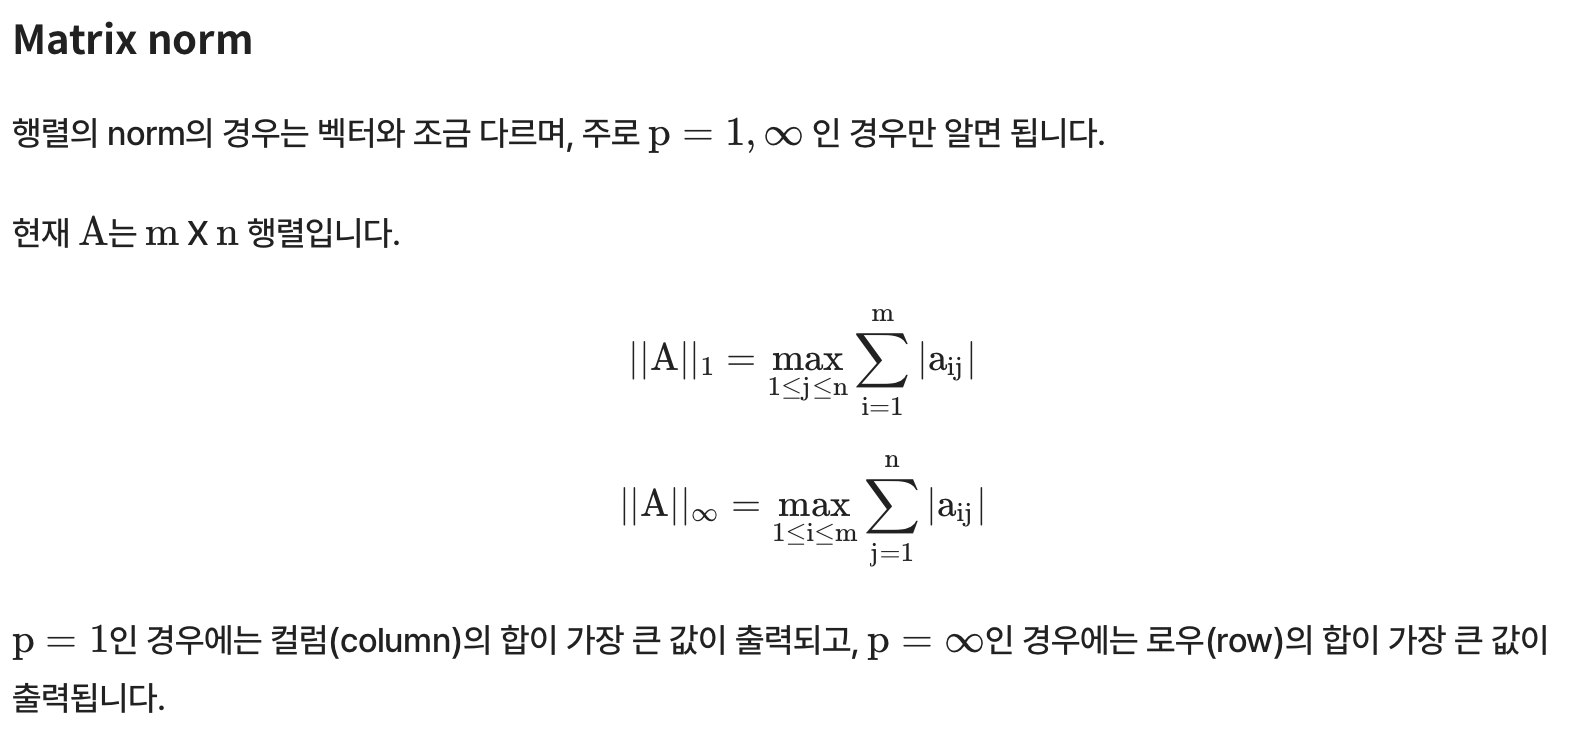

In [29]:
A = np.array([[1,2,3], [1,2,3], [4,6,8]])

one_norm_A = np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

inf_norm_A = np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)

result one norm of A : 14.0
result inf norm of A : 18.0


## 7-6. Dropout

드롭아웃(Dropout) 기법은 2014년도에 나온 논문입니다.

논문 제목 : Dropout: A Simple Way to Prevent Neural Networks from Overfitting
논문 발표 시점 : 2014년
논문 링크 : 논문 주소 (https://jmlr.org/papers/v15/srivastava14a.html)

드롭아웃 기법이 나오기 전의 신경망은 fully connected architecture로 모든 뉴런들이 연결되어 있었습니다.

드롭아웃이란 확률적으로 랜덤하게 몇 가지의 뉴런만 선택하여 정보를 전달하는 과정입니다. 이름 그대로 몇 가지의 값들을 모든 뉴런에 전달하는 것이 아닌, 확률적으로 버리면서 전달하는 기법입니다. 드롭아웃은 오버피팅을 막는 regularization layer 중 하나입니다. 확률을 너무 높이면 (비활성화된 뉴런의 비중을 높이면) 모델 안에서 값들이 제대로 전달되지 않으므로 학습이 잘 되지 않고, 확률을 너무 낮추는 경우에는 fully connected layer와 같이 동작합니다. fully connected layer에서 오버피팅이 생기는 경우에 주로 dropout layer를 추가합니다.

코드는 간단합니다. 논문이 나온 지도 오래되었기 때문에, 여러 프레임워크에서 간단하게 구현할 수 있도록 되어있습니다.

- Keras Dropout(https://keras.io/api/layers/regularization_layers/dropout/)

### 실습 (not overfitting)
---
fashion mnist(https://keras.io/api/datasets/fashion_mnist/)라는 데이터 셋을 불러와서 학습을 시키도록 하겠습니다. 이 데이터셋은 총 10개의 클래스로 구성되어 있고, 데이터가 간단한 편이기도 하여 5 epoch 정도만 학습시켜도 어느 정도 결과가 나옵니다. 드롭아웃 레이어를 중간에 추가하여 확률을 1에 가깝게 주면 어떻게 되는지 살펴보도록 하겠습니다.

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [32]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [33]:
# dropout 확률을 0.9로 주었을 때의 결과

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4512 - accuracy: 0.4312
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2095 - accuracy: 0.5067
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1657 - accuracy: 0.5232
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1308 - accuracy: 0.5367
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1003 - accuracy: 0.5540


In [34]:
# dropout 없을 때

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4955 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3740 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3332 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8868
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.8937


### 실습 (overfitting)
---
overfitting이 되는지 확인해 보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도입니다. 우리는 위의 데이터를 이제 train:valid=99:1의 비율로 나눈 뒤에 loss function의 값을 그려보고, overfitting이 생기는 fully connected layer를 만들어보도록 합시다. overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄였습니다.

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 2s 15ms/step - loss: 2.0411 - accuracy: 0.4991 - val_loss: 1.6264 - val_accuracy: 0.5983
Epoch 2/200
117/117 [==============================] - 2s 14ms/step - loss: 1.3806 - accuracy: 0.6202 - val_loss: 1.1576 - val_accuracy: 0.6617
Epoch 3/200
117/117 [==============================] - 2s 13ms/step - loss: 1.0574 - accuracy: 0.6832 - val_loss: 0.9373 - val_accuracy: 0.7283
Epoch 4/200
117/117 [==============================] - 2s 13ms/step - loss: 0.8846 - accuracy: 0.7213 - val_loss: 0.8063 - val_accuracy: 0.7600
Epoch 5/200
117/117 [==============================] - 2s 13ms/step - loss: 0.7819 - accuracy: 0.7376 - val_loss: 0.7300 - val_accuracy: 0.7717
Epoch 6/200
117/117 [==============================] - 2s 13ms/step - loss: 0.7212 - accuracy: 0.7467 - val_loss: 0.6853 - val_accuracy: 0.7733
Epoch 7/200
117/117 [==============================] - 2s 13ms/step - loss: 0.6797 - accuracy: 0.7585 - val_loss: 0.6470 - val_accuracy:

117/117 [==============================] - 2s 13ms/step - loss: 0.3966 - accuracy: 0.8611 - val_loss: 0.4057 - val_accuracy: 0.8383
Epoch 58/200
117/117 [==============================] - 2s 13ms/step - loss: 0.3944 - accuracy: 0.8616 - val_loss: 0.4043 - val_accuracy: 0.8367
Epoch 59/200
117/117 [==============================] - 2s 13ms/step - loss: 0.3945 - accuracy: 0.8610 - val_loss: 0.4026 - val_accuracy: 0.8317
Epoch 60/200
117/117 [==============================] - 2s 13ms/step - loss: 0.3920 - accuracy: 0.8625 - val_loss: 0.4003 - val_accuracy: 0.8367
Epoch 61/200
117/117 [==============================] - 2s 14ms/step - loss: 0.3917 - accuracy: 0.8620 - val_loss: 0.4032 - val_accuracy: 0.8417
Epoch 62/200
117/117 [==============================] - 2s 13ms/step - loss: 0.3904 - accuracy: 0.8625 - val_loss: 0.3989 - val_accuracy: 0.8383
Epoch 63/200
117/117 [==============================] - 2s 13ms/step - loss: 0.3884 - accuracy: 0.8634 - val_loss: 0.3973 - val_accuracy: 0.843

117/117 [==============================] - 3s 27ms/step - loss: 0.3438 - accuracy: 0.8791 - val_loss: 0.3675 - val_accuracy: 0.8583
Epoch 114/200
117/117 [==============================] - 3s 27ms/step - loss: 0.3436 - accuracy: 0.8784 - val_loss: 0.3624 - val_accuracy: 0.8483
Epoch 115/200
117/117 [==============================] - 3s 27ms/step - loss: 0.3426 - accuracy: 0.8791 - val_loss: 0.3591 - val_accuracy: 0.8500
Epoch 116/200
117/117 [==============================] - 3s 27ms/step - loss: 0.3417 - accuracy: 0.8800 - val_loss: 0.3677 - val_accuracy: 0.8583
Epoch 117/200
117/117 [==============================] - 3s 28ms/step - loss: 0.3413 - accuracy: 0.8791 - val_loss: 0.3582 - val_accuracy: 0.8583
Epoch 118/200
117/117 [==============================] - 3s 28ms/step - loss: 0.3405 - accuracy: 0.8807 - val_loss: 0.3577 - val_accuracy: 0.8550
Epoch 119/200
117/117 [==============================] - 3s 29ms/step - loss: 0.3393 - accuracy: 0.8809 - val_loss: 0.3560 - val_accuracy:

117/117 [==============================] - 4s 35ms/step - loss: 0.3111 - accuracy: 0.8895 - val_loss: 0.3388 - val_accuracy: 0.8683
Epoch 170/200
117/117 [==============================] - 3s 27ms/step - loss: 0.3090 - accuracy: 0.8904 - val_loss: 0.3414 - val_accuracy: 0.8683
Epoch 171/200
117/117 [==============================] - 3s 28ms/step - loss: 0.3092 - accuracy: 0.8903 - val_loss: 0.3438 - val_accuracy: 0.8617
Epoch 172/200
117/117 [==============================] - 3s 29ms/step - loss: 0.3114 - accuracy: 0.8891 - val_loss: 0.3422 - val_accuracy: 0.8600
Epoch 173/200
117/117 [==============================] - 3s 29ms/step - loss: 0.3082 - accuracy: 0.8905 - val_loss: 0.3366 - val_accuracy: 0.8667
Epoch 174/200
117/117 [==============================] - 3s 28ms/step - loss: 0.3069 - accuracy: 0.8912 - val_loss: 0.3375 - val_accuracy: 0.8633
Epoch 175/200
117/117 [==============================] - 3s 28ms/step - loss: 0.3068 - accuracy: 0.8912 - val_loss: 0.3324 - val_accuracy:

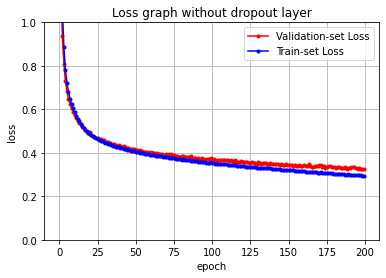

In [36]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

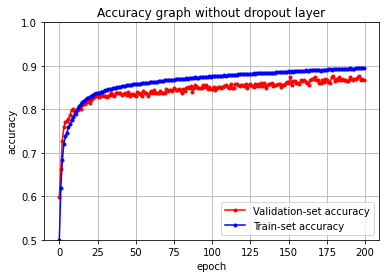

In [37]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

dropout layer가 없는 fully connected layer에서 200번 정도의 학습을 하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌습니다. 그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었습니다.
이렇게 오버피팅을 만든 환경에서 dropout layer를 추가한 뒤 나머지 환경은 같게 한 실험을 살펴보도록 하겠습니다.

In [38]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 5s 35ms/step - loss: 2.0789 - accuracy: 0.4832 - val_loss: 1.6973 - val_accuracy: 0.5867
Epoch 2/200
117/117 [==============================] - 4s 31ms/step - loss: 1.4787 - accuracy: 0.5463 - val_loss: 1.2393 - val_accuracy: 0.6350
Epoch 3/200
117/117 [==============================] - 4s 32ms/step - loss: 1.1788 - accuracy: 0.6132 - val_loss: 1.0305 - val_accuracy: 0.7017
Epoch 4/200
117/117 [==============================] - 4s 31ms/step - loss: 1.0125 - accuracy: 0.6631 - val_loss: 0.9006 - val_accuracy: 0.7417
Epoch 5/200
117/117 [==============================] - 4s 30ms/step - loss: 0.9101 - accuracy: 0.6902 - val_loss: 0.8106 - val_accuracy: 0.7500
Epoch 6/200
117/117 [==============================] - 4s 31ms/step - loss: 0.8381 - accuracy: 0.7079 - val_loss: 0.7511 - val_accuracy: 0.7700
Epoch 7/200
117/117 [==============================] - 4s 31ms/step - loss: 0.7874 - accuracy: 0.7208 - val_loss: 0.7113 - val_accuracy:

117/117 [==============================] - 3s 30ms/step - loss: 0.4311 - accuracy: 0.8462 - val_loss: 0.4019 - val_accuracy: 0.8333
Epoch 58/200
117/117 [==============================] - 4s 30ms/step - loss: 0.4292 - accuracy: 0.8470 - val_loss: 0.4059 - val_accuracy: 0.8300
Epoch 59/200
117/117 [==============================] - 4s 31ms/step - loss: 0.4293 - accuracy: 0.8481 - val_loss: 0.4047 - val_accuracy: 0.8317
Epoch 60/200
117/117 [==============================] - 4s 31ms/step - loss: 0.4262 - accuracy: 0.8491 - val_loss: 0.4016 - val_accuracy: 0.8333
Epoch 61/200
117/117 [==============================] - 4s 30ms/step - loss: 0.4250 - accuracy: 0.8494 - val_loss: 0.4011 - val_accuracy: 0.8383
Epoch 62/200
117/117 [==============================] - 4s 32ms/step - loss: 0.4231 - accuracy: 0.8505 - val_loss: 0.3990 - val_accuracy: 0.8400
Epoch 63/200
117/117 [==============================] - 4s 31ms/step - loss: 0.4213 - accuracy: 0.8520 - val_loss: 0.3955 - val_accuracy: 0.838

117/117 [==============================] - 2s 15ms/step - loss: 0.3702 - accuracy: 0.8699 - val_loss: 0.3520 - val_accuracy: 0.8650
Epoch 114/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3694 - accuracy: 0.8698 - val_loss: 0.3510 - val_accuracy: 0.8583
Epoch 115/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3682 - accuracy: 0.8694 - val_loss: 0.3493 - val_accuracy: 0.8633
Epoch 116/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3680 - accuracy: 0.8697 - val_loss: 0.3523 - val_accuracy: 0.8567
Epoch 117/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3671 - accuracy: 0.8707 - val_loss: 0.3508 - val_accuracy: 0.8633
Epoch 118/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3652 - accuracy: 0.8713 - val_loss: 0.3511 - val_accuracy: 0.8667
Epoch 119/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3672 - accuracy: 0.8717 - val_loss: 0.3475 - val_accuracy:

117/117 [==============================] - 2s 15ms/step - loss: 0.3370 - accuracy: 0.8805 - val_loss: 0.3278 - val_accuracy: 0.8617
Epoch 170/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3360 - accuracy: 0.8807 - val_loss: 0.3314 - val_accuracy: 0.8633
Epoch 171/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3383 - accuracy: 0.8796 - val_loss: 0.3270 - val_accuracy: 0.8700
Epoch 172/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3364 - accuracy: 0.8794 - val_loss: 0.3260 - val_accuracy: 0.8650
Epoch 173/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3366 - accuracy: 0.8818 - val_loss: 0.3270 - val_accuracy: 0.8650
Epoch 174/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3346 - accuracy: 0.8809 - val_loss: 0.3282 - val_accuracy: 0.8700
Epoch 175/200
117/117 [==============================] - 2s 15ms/step - loss: 0.3339 - accuracy: 0.8824 - val_loss: 0.3257 - val_accuracy:

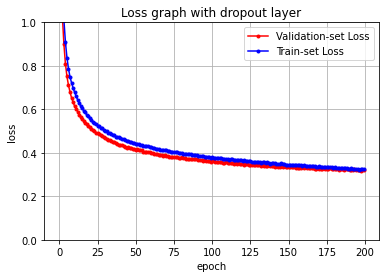

In [39]:
# Q. loss 값의 그래프를 그려봅시다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

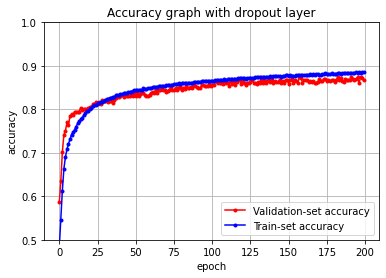

In [40]:
# Q. accuracy 값의 그래프를 그려봅시다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

좋은 데이터를 가지고 오버피팅을 만드는 환경이 조금 어렵긴 했지만, dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인하였습니다. 사실 더 복잡한 네트워크나, 더 어려운 데이터의 경우에는 이러한 오버피팅이 더 자주 있는 일이므로, dropout layer를 추가하는 경우가 많습니다. 하지만 이 또한 확률 값이 파라미터로 들어가므로, 어떠한 값을 선택하느냐는 데이터와 네트워크에 따라 달린 일입니다.

## 7-7. Batch Normalization

논문 제목 : Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
논문 발표 시점 : 2015년
논문 링크 : 논문 PDF (http://arxiv.org/pdf/1502.03167)
(batch normalization과 internal covariate shift가 연관성이 없다는 반론(https://arxiv.org/pdf/1805.11604)도 있기 때문에, "이런 이야기도 있구나~" 하고 받아들이시면 됩니다.)

딥러닝에서 경사 하강법(gradient descent)으로 모델의 가중치를 업데이트할 때, 데이터셋 전체를 본 다음 업데이트하는 'Batch Gradient Descent'와 데이터 하나를 관찰할 때마다 업데이트하는 'Stochastic Gradient Descent' 방법이 있었죠. 이 둘의 절충안이 바로 데이터셋을 여러 개의 mini-batch로 쪼갠 다음 하나의 batch를 처리할 때마다 가중치를 업데이트하는 'Mini-batch Gradient Descent'입니다. 데이터셋을 mini-batch로 쪼개는 방법은 학습 속도와 안정성 모두를 잡았지만, 딥러닝 모델 안에서 데이터가 처리되면서 여러 개의 mini-batch들 사이에 데이터 분포의 차이가 생길 수 있다는 문제가 있었습니다. (이것이 internal covariate shift를 대략적으로 설명한 부분입니다.)

데이터 분포의 차이가 존재한다면 gradient 값의 차이도 있을 것이고, 같은 learning rate 값을 가지고 있더라도 gradient vanishing이나 gradient explode 문제가 생길 수 있습니다. batch normalization 기법은 각 mini-batch마다 평균과 분산을 계산하여 정규화(normalization)를 수행하고, scale and shift 변환을 적용하여 mini-batch들이 비슷한 데이터 분포를 가지도록 합니다.

논문에서 설명한 알고리즘을 아래에 적어보도록 하겠습니다.
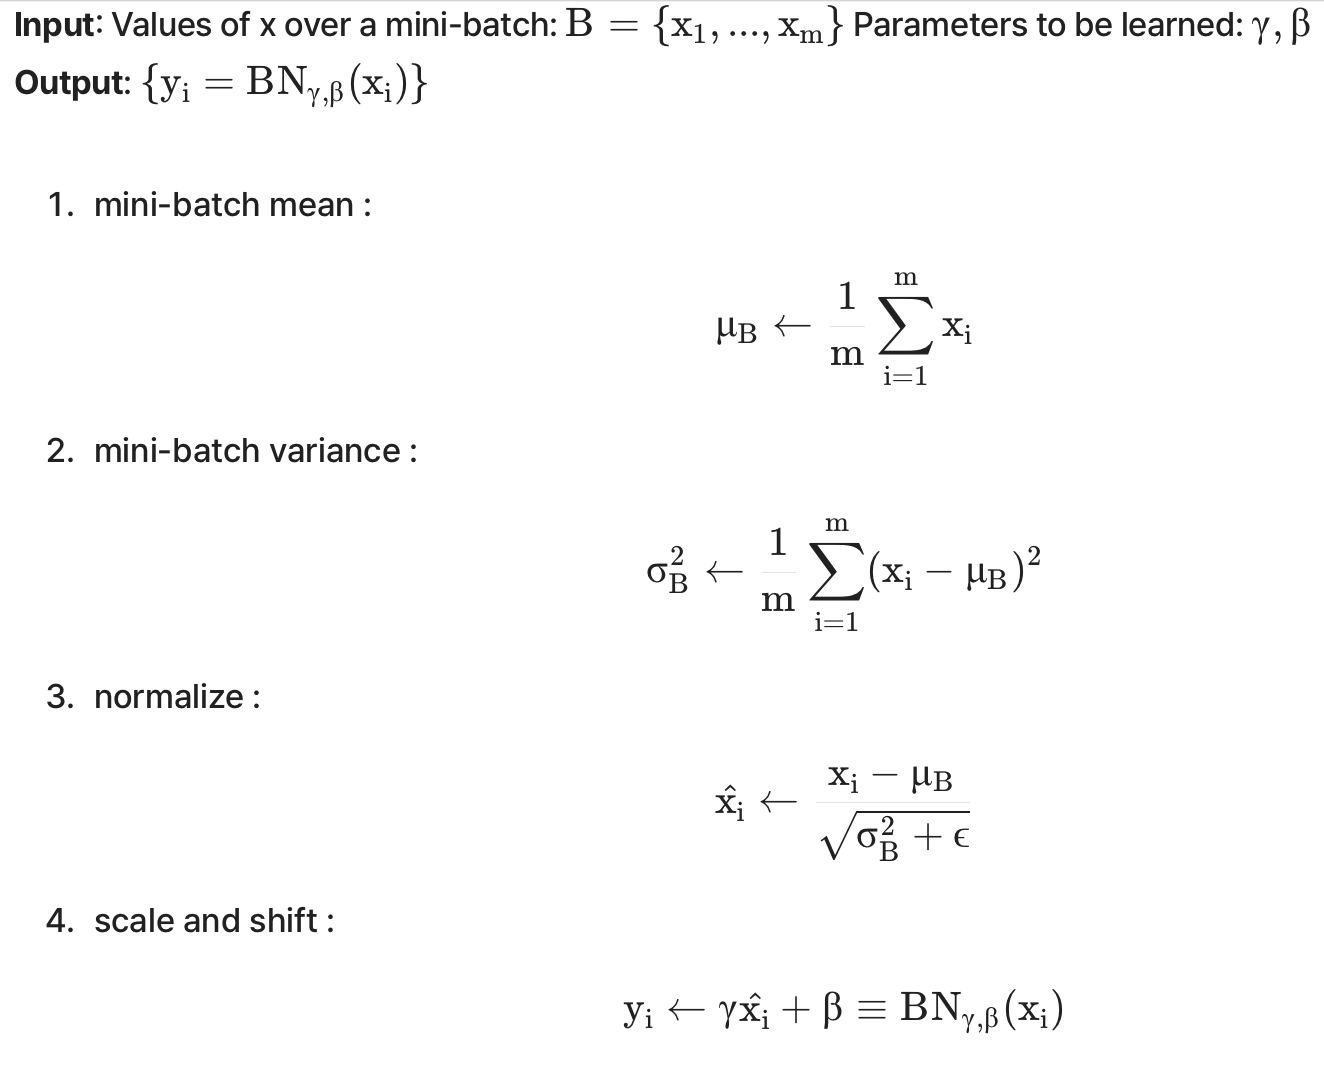
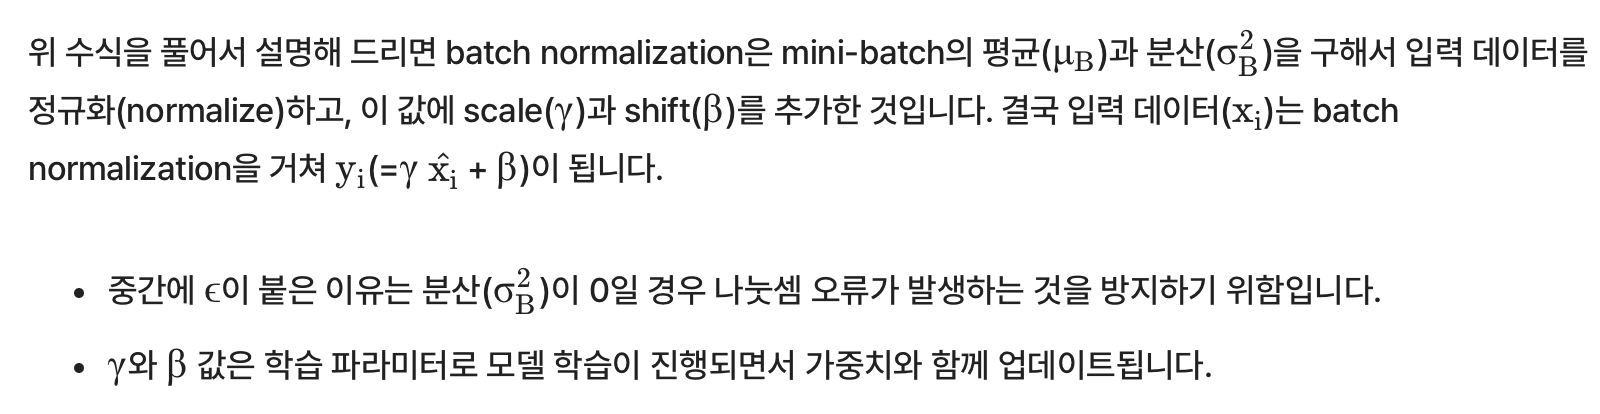

### 실습
---
아무것도 하지 않은 fully connected layer와 batch normalization layer를 추가한 두 실험을 비교하고자 합니다. 중점적으로 봐야 할 내용은 정확도 비교와 속도의 차이입니다.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 2s 49ms/step - loss: 1.2535 - accuracy: 0.5873 - val_loss: 0.7648 - val_accuracy: 0.7396
Epoch 2/20
21/21 [==============================] - 1s 34ms/step - loss: 0.6702 - accuracy: 0.7697 - val_loss: 0.6082 - val_accuracy: 0.7949
Epoch 3/20
21/21 [==============================] - 1s 35ms/step - loss: 0.5658 - accuracy: 0.8103 - val_loss: 0.5419 - val_accuracy: 0.8165
Epoch 4/20
21/21 [==============================] - 1s 35ms/step - loss: 0.5148 - accuracy: 0.8267 - val_loss: 0.5080 - val_accuracy: 0.8267
Epoch 5/20
21/21 [==============================] - 1s 34ms/step - loss: 0.4838 - accuracy: 0.8365 - val_loss: 0.4806 - val_accuracy: 0.8371
Epoch 6/20
21/21 [==============================] - 1s 35ms/step - loss: 0.4625 - accuracy: 0.8403 - val_loss: 0.4637 - val_accuracy: 0.8426
Epoch 7/20
21/21 [==============================] - 1s 37ms/step - loss: 0.4411 - accuracy: 0.8496 - val_loss: 0.4444 - val_accuracy: 0.8489
Epoch 8/20
21

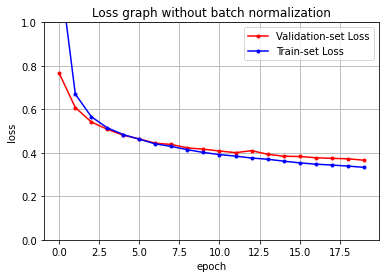

In [5]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

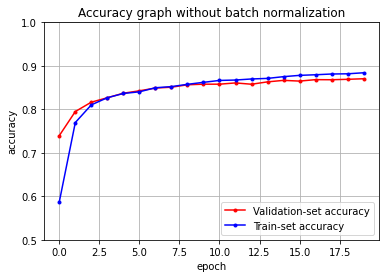

In [6]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [7]:
# Q. 두 개의 dense layer 사이에 batch normalization layer를 추가하는 코드입니다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 batch normalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 5s 77ms/step - loss: 0.8431 - accuracy: 0.7188 - val_loss: 0.9511 - val_accuracy: 0.7235
Epoch 2/20
21/21 [==============================] - 1s 64ms/step - loss: 0.4654 - accuracy: 0.8379 - val_loss: 0.8158 - val_accuracy: 0.7647
Epoch 3/20
21/21 [==============================] - 1s 64ms/step - loss: 0.4128 - accuracy: 0.8556 - val_loss: 0.7103 - val_accuracy: 0.8085
Epoch 4/20
21/21 [==============================] - 1s 64ms/step - loss: 0.3773 - accuracy: 0.8683 - val_loss: 0.6529 - val_accuracy: 0.8191
Epoch 5/20
21/21 [==============================] - 1s 64ms/step - loss: 0.3526 - accuracy: 0.8774 - val_loss: 0.6063 - val_accuracy: 0.8279
Epoch 6/20
21/21 [==============================] - 1s 66ms/step - loss: 0.3319 - accuracy: 0.8823 - val_loss: 0.5721 - val_accuracy: 0.8442
Epoch 7/20
21/21 [==============================] - 1s 64ms/step - loss: 0.3144 - accuracy: 0.8899 - val_loss: 0.5296 - val_accuracy: 0.8500
Epoch 8/20
21

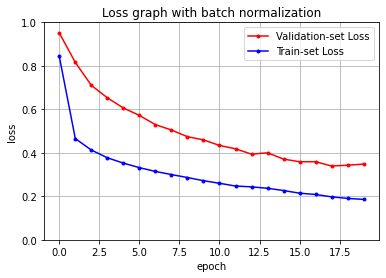

In [8]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

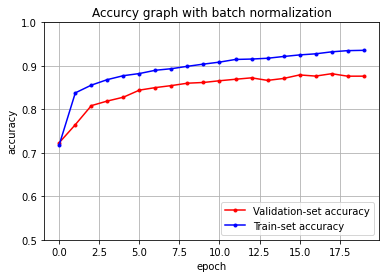

In [9]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

기존의 fully connected layer도 낮지 않은 결과를 가져오지만, batch normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있습니다. 또한 loss 함수의 감소도 더 빨라짐을 확인할 수 있었습니다. 즉 batch normalization으로 인해 데이터 분포가 정규화되면서 좀 더 고른 분포를 가지기도 하며, 모델과 함께 학습되는 γ, β 파라미터로 데이터 분포를 적절하게 변환함으로써 보다 안정적인 학습이 가능해집니다.

### 종합퀴즈
---
Q. L1 regularization과 L2 regularization의 공통점과 차이점은 무엇이었나요?

[공통점]
두 방법 모두 Lp norm 개념을 사용하고 있고, 오버피팅이 발생하지 않도록 모델에 제약 조건을 걸어줍니다.

[차이점]
L1 regularization(Lasso)은 L1 norm을 사용하며, 일부 coefficient 값을 0으로 보내기 때문에 차원 축소와 비슷한 역할을 합니다.
L2 regularization(Ridge)은 L2 norm을 사용하며, 계수를 0으로 보내지는 않지만 제곱 항이 있기 때문에 L1 regularization보다는 수렴 속도가 빠르다는 장점이 있습니다.